<a href="https://www.kaggle.com/code/cameronseamons/customer-purchase-behavior-analysis?scriptVersionId=198717540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

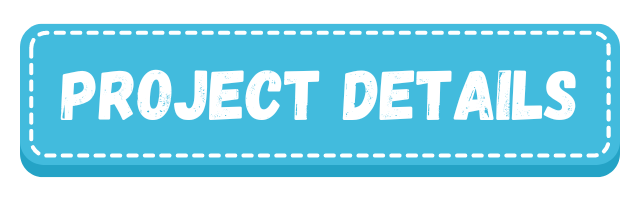


# About The Project

**Description:** This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. 
It includes detailed information about customer demographics, product types, and purchase behaviors.


## Objectives
The goal of this project is to conduct an in-depth analysis to uncover key insights that can inform business strategies:

### Insights and recommendations are provided covering the following key areas:

- Sales Trend Analysis: Evaluation of historical sales patterns by month and by products, focusing on revenue and Average Order Value (AOV)
- Product Performance: an Analysis on various products to understand their impact on sales and returns.
- Loyalty Program Success: Assessment of loyalty membership
- Customer Demographics Comparisons: high level comparison of sales and orders by different customers and how their metrics compare to the overall business

#### Significance
The insights derived from this analysis will help optimize marketing efforts, enhance customer engagement, and drive sales growth in the company's electronics category.


<br>

[➡️ Jump straight to the insights 💡](#Insights)

[✅ View my Recommendations](#Recommendations)

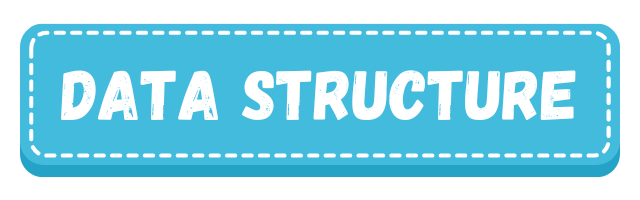

## Data Structure Overview:
The Electronic Sales Database contains both numeric and categorical data, capturing essential customer and transaction details.

- Customer ID: Unique identifier for each customer.
- Age: Age of the customer (numeric)
- Gender: Gender of the customer (Male or Female)
- Loyalty Member: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)
- Product Type: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)
- SKU: a unique code for each product.
- Rating: Customer rating of the product (1-5 stars) (Should have no Null Ratings)
- Order Status: Status of the order (Completed, Cancelled)
- Payment Method: Method used for payment (e.g., Cash, Credit Card, Paypal)
- Total Price: Total price of the transaction (numeric)
- Unit Price: Price per unit of the product (numeric)
- Quantity: Number of units purchased (numeric)
- Purchase Date: Date of the purchase (format: YYYY-MM-DD)
- Shipping Type: Type of shipping chosen (e.g., Standard, Overnight, Express)
- Add-ons Purchased: List of any additional items purchased (e.g., Accessories, Extended Warranty)
- Add-on Total: Total price of add-ons purchased (numeric)


**Entity Relationship Diagram:**

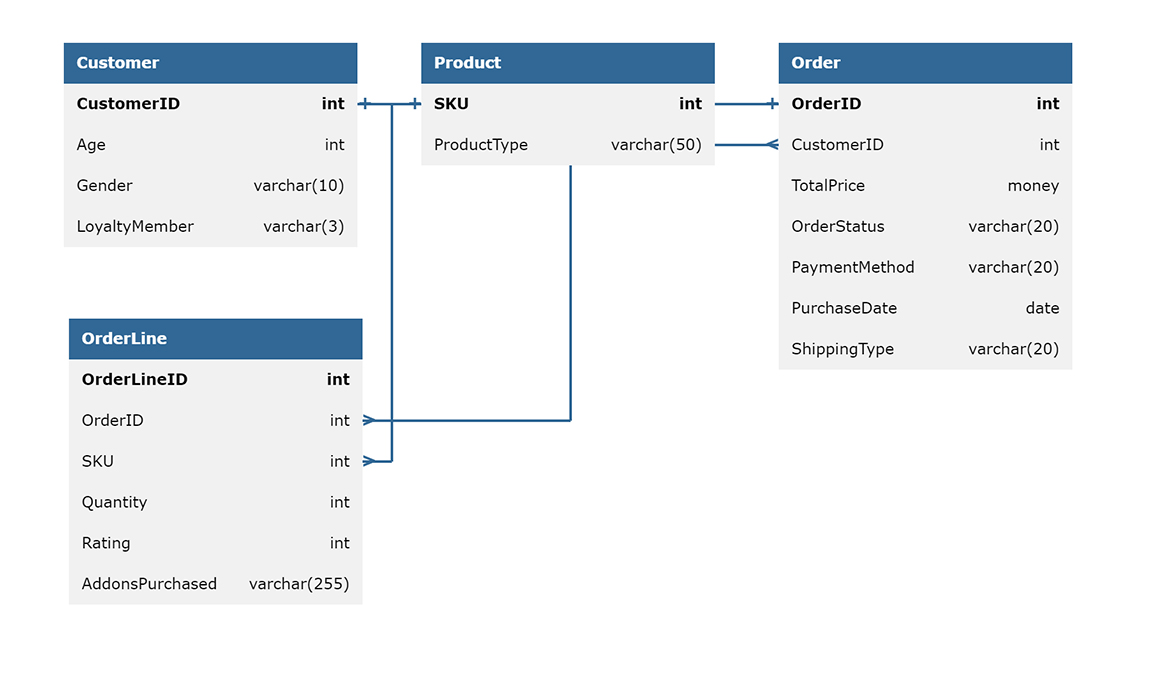

#### Total row count: 20,000 Records

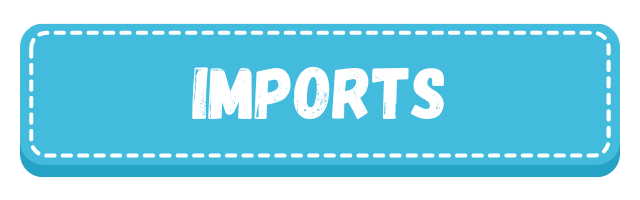

In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Set seaborn styles
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_palette("Set2")


# Clear annoying package and version warnings
import warnings
warnings.filterwarnings('ignore')

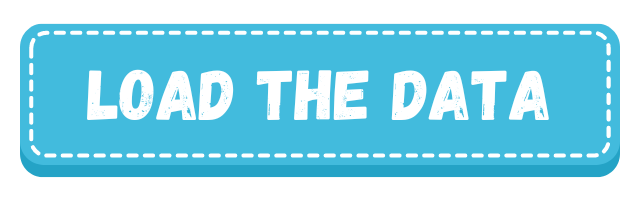


## Load the data from the Kaggle Datasource



In [2]:
# On local machines I always start with this
# pwd = os.getcwd()

# This makes it extremely easy to move data to other folders and not have to worry about chaning paths in your code



# for kaggle we could tweak it a bit to get the same benefit
pwd = "/kaggle/input/electronic-sales-sep2023-sep2024/"


# Now for any other exports or imports I can just use pwd

# Read in the Data
df = pd.read_csv(pwd + "Electronic_sales_Sep2023-Sep2024.csv")

In [3]:
# Preview Data
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34



## Questions to Answer:

1. **Sales Performance:**
   - What is the total revenue generated from completed sales?
   - How does revenue vary by product?

2. **Customer Demographics:**
   - What is the average age of customers for each product?
   - How does gender distribution vary among purchasers?

3. **Loyalty Impact:**
   - Do loyalty members have a higher average rating for products compared to non-members?
   - What percentage of total purchases are made by loyalty members?
   - Is there a significant difference in average order value (AOV) between loyalty members and non-members?

4. **Order Status Analysis:**
   - What is the cancellation rate for purchases?
   - How many orders are placed each season and month?

5. **Feedback Insights:**
   - What is the average rating for each product?
   - How does customer feedback sentiment correlate with order status (e.g., completed vs. cancelled)?

6. **Add-ons Impact:**
   - How do add-ons (like Impulse Items or Accessories) affect the total purchase price?

7. **Churn Analysis:**
   - What factors contribute to loyalty members discontinuing their status, and what is the churn rate?

### Additional Questions to Consider:

1. **Shipping Insights:**
   - How does shipping type impact total sales (e.g., are express shipments more common for higher-value orders)?

2. **Purchase Trends Over Time:**
   - What are the monthly purchase trends? Are there sales peaks during certain months or events?

3. **Payment Method Analysis:**
   - Which payment method is most popular, and how does it correlate with order completion rates?

4. **Quantity Analysis:**
   - What is the average quantity purchased per transaction, and how does it vary by product?

5. **Customer Behavior:**
   - Are there patterns in customer behavior based on age or gender (e.g., do younger customers purchase more impulse items)?


In [4]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

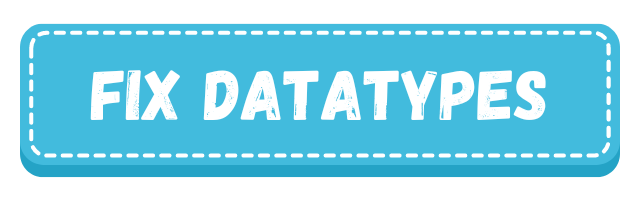

#### We need to make our date a Date
- We can do this easily using 'pd.to_datetime'

In [5]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [6]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d')

df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

In [7]:
# we also need to fix the na values in Add-ons

df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna(value='None')

df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


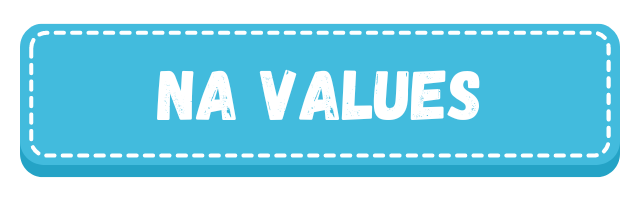

In [8]:
# Double checking any other na values

df.isna().nunique()

Customer ID          1
Age                  1
Gender               2
Loyalty Member       1
Product Type         1
SKU                  1
Rating               1
Order Status         1
Payment Method       1
Total Price          1
Unit Price           1
Quantity             1
Purchase Date        1
Shipping Type        1
Add-ons Purchased    1
Add-on Total         1
dtype: int64

#### We have an NA value in Gender
- Lets take a closer look

In [9]:
df[df['Gender'].isna()]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,None,0.0


In [10]:
# Lets check the customer_id to see if they have another row with the Gender info

df[df['Customer ID'] == 19998]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,None,0.0


#### Unfortunately that doesnt help us.
- I was able to check the original data and find that the Gender for Customer_id 19998 should be 'Male'
- Lets add the data into our df

In [11]:
# Set customer '19998' Gender to Male
df.loc[df['Customer ID'] == 19998, 'Gender'] = 'Male'

# check the df to verify the change was made
df[df['Customer ID'] == 19998]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,Male,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,None,0.0


In [12]:
# Check for duplicates

df.duplicated().value_counts()

False    20000
Name: count, dtype: int64

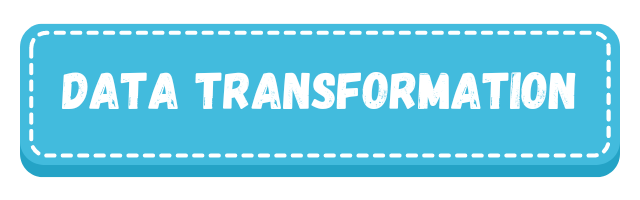

## Data transformation

- We can create new data from the data we already have. This can be used for going deeper into our data

In [13]:
# Extract Year-Month for use later
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')

df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,YearMonth
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,2024-03
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2024-04
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,2023-10
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,2024-08
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,2024-06
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,2024-07
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2024-08
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,2024-01


## Creating a New Loyalty Member Status

In [14]:
# Copy data so we can use it for determining loyalty member status
loyalty_df = df.copy()

# Sort by Customer ID and Purchase Date
loyalty_df.sort_values(by=['Customer ID', 'Purchase Date'], inplace=True)

# Determine loyalty status
def determine_loyalty_status(group):
    statuses = []
    previous_status = None
    
    for _, row in group.iterrows():
        current_status = row['Loyalty Member']
        
        if previous_status is None:  # First order
            if current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        else:
            if previous_status == 'Yes' and current_status == 'No':
                statuses.append('Churned')
            elif previous_status == 'No' and current_status == 'Yes':
                statuses.append('New Member')
            elif current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        
        previous_status = current_status
    
    return pd.Series(statuses, index=group.index)

# Apply the function to get member statuses
loyalty_df['Loyalty Status'] = loyalty_df.groupby('Customer ID').apply(determine_loyalty_status).reset_index(drop=True)

# Display updated info
loyalty_df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,YearMonth,Loyalty Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,2024-03,Non Member
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2024-04,Non Member
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,2023-10,Non Member
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,2024-08,New Member
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,2024-05,Regular Member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,2024-06,Non Member
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,2024-07,New Member
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2024-08,Churned
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,2024-01,Non Member


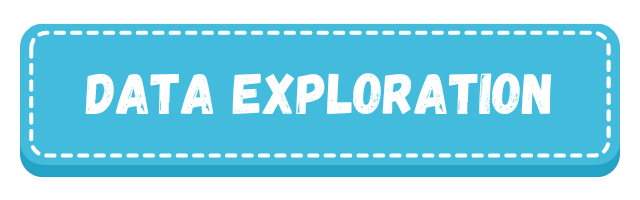

# Revenue and Sales

## AOV distibution

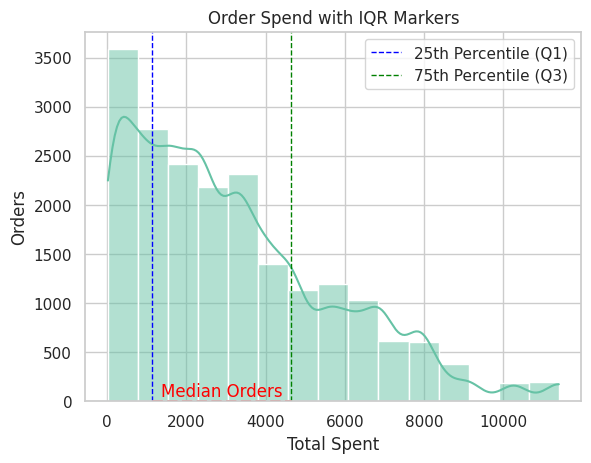

In [15]:
# Visualize price distibution

# Calculate IQR
Q1 = df['Total Price'].quantile(0.25)
Q3 = df['Total Price'].quantile(0.75)
IQR = Q3 - Q1
median = df['Total Price'].median()

# Plot
sns.histplot(df['Total Price'], bins=15, kde=True)
plt.axvline(Q1, color='blue', linestyle='dashed', linewidth=1, label='25th Percentile (Q1)')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=1, label='75th Percentile (Q3)')
plt.hlines(y=0, xmin=Q1, xmax=Q3, color='red', linestyle='dashed', linewidth=2,)
plt.text((Q1 + Q3) / 2, 10, 'Median Orders', color='red', ha='center', va='bottom')

# title and labels
plt.title('Order Spend with IQR Markers')
plt.xlabel('Total Spent')
plt.ylabel('Orders', fontsize=12)
plt.legend()
plt.show()

## What are the most popular products?

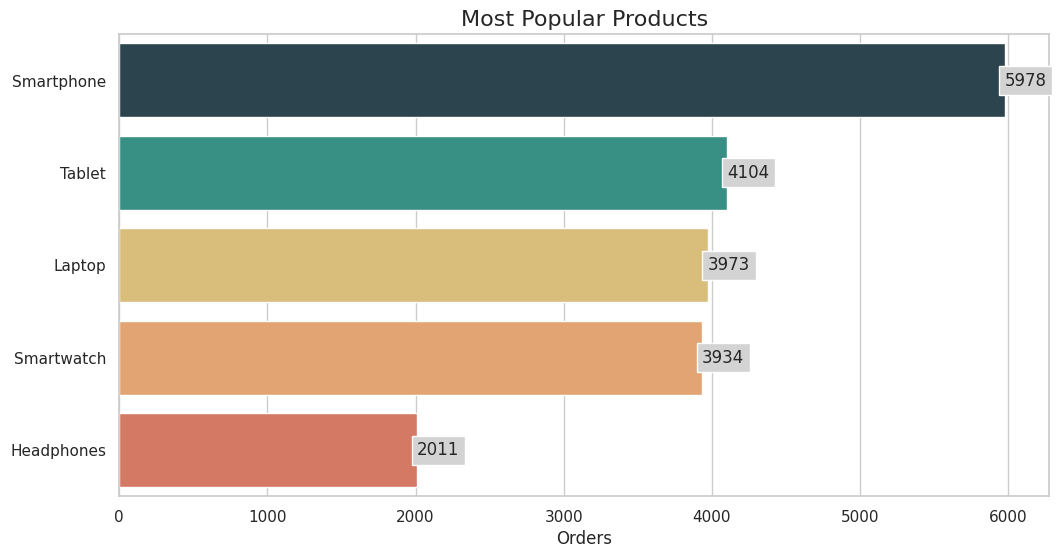

In [16]:
# Most popular products

colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]


plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Product Type', order=df['Product Type'].value_counts().index, palette=colors)
plt.title('Most Popular Products', fontsize=16)
plt.xlabel('Orders')
plt.ylabel('')

ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))
plt.show()

## How do our product sales look month to month?

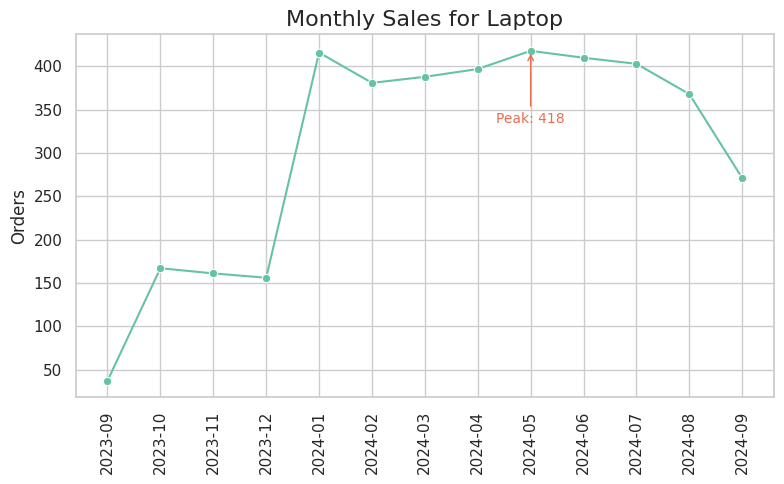

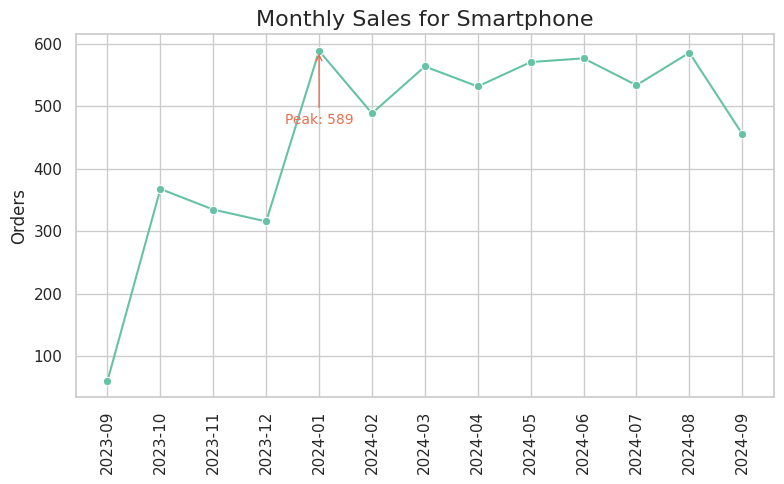

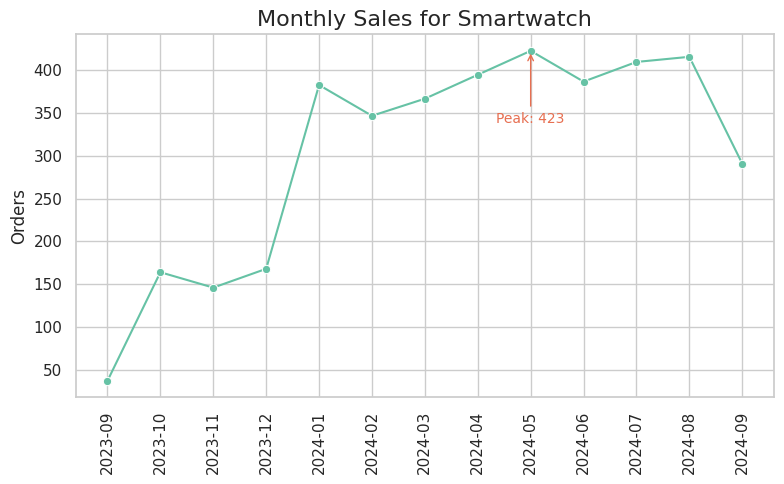

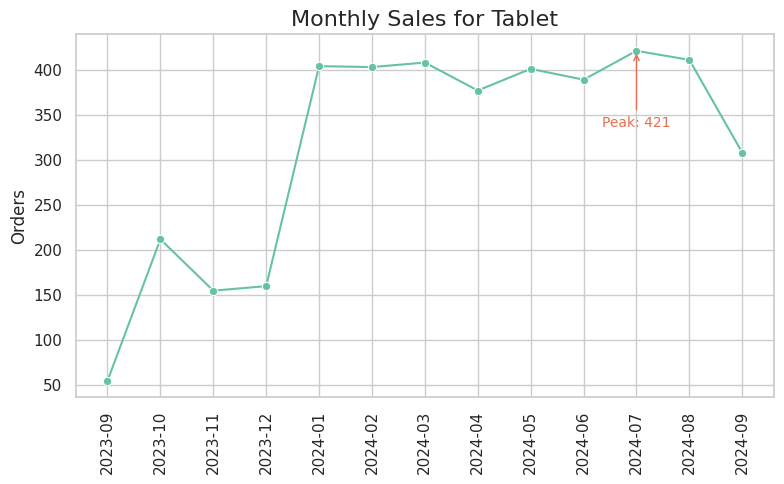

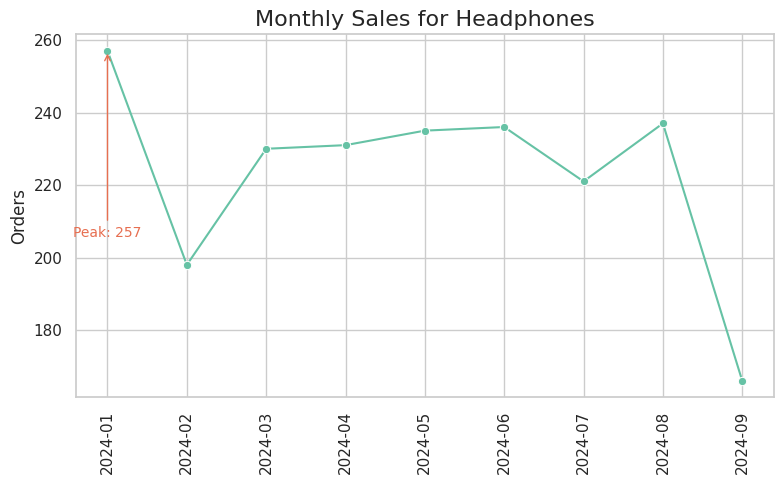

In [17]:
# Product sales by Month
monthly_sales = df.groupby(['YearMonth', 'Product Type']).size().reset_index(name='Sales')

# Convert 'YearMonth' to string since plotting doesnt like dates
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Pivot the data for easier plotting
pivot_sales = monthly_sales.pivot(index='YearMonth', columns='Product Type', values='Sales').fillna(0)


# Get unique product types
product_types = monthly_sales['Product Type'].unique()

# Create a seperate plot for each product
for product in product_types:
    product_data = monthly_sales[monthly_sales['Product Type'] == product]
    
    # Create each plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=product_data, x='YearMonth', y='Sales', marker='o', palette=colors)
    
    # Mark the peak sales
    peak_sales = product_data['Sales'].max()
    peak_month = product_data[product_data['Sales'] == peak_sales]['YearMonth'].values[0]
    plt.annotate(f'Peak: {peak_sales}', 
                 xy=(peak_month, peak_sales), 
                 xytext=(peak_month, peak_sales * .8),  # Adjust value to change position of the text
                 arrowprops=dict(arrowstyle='->', color='#e76f51'),
                 color='#e76f51',
                 fontsize=10,
                 ha='center')
    
    plt.title(f'Monthly Sales for {product}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Orders')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## What is the cancellation rate for purchases?

In [18]:
# Count the orders by order status
order_counts = df.groupby('Order Status').size()

# Calculate cancelled percentage
order_counts['Cancelled Percentage'] = (order_counts.get('Cancelled', 0) / order_counts.sum()) * 100

order_counts['Cancelled Percentage'] = order_counts['Cancelled Percentage'].round(2)

cancelled_percentage = order_counts['Cancelled Percentage']

print('Cancelled Percentage: ', cancelled_percentage)

Cancelled Percentage:  32.84


## Did shipping speed have any effect on cancelled orders?

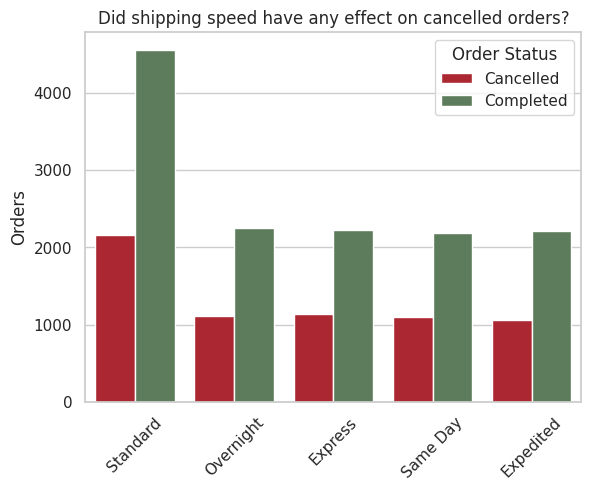

In [19]:
# View completed orders vs Shipping speed

colors = ["#c1121f", "#588157"]

sns.countplot(data=df, x='Shipping Type', hue='Order Status', palette=colors)
plt.title('Did shipping speed have any effect on cancelled orders?')
plt.xlabel('')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.legend(title='Order Status')
plt.show()

### The graph above makes it APPEAR like standard has higher cancellation. But lets look a little deeper.

### Cancelled orders by shipping type

In [20]:
# Count the orders by shipping type
shipping_counts = df.groupby(['Shipping Type', 'Order Status']).size().unstack(fill_value=0)

# Calculate cancelled percentage
shipping_counts['Cancelled Percentage'] = (shipping_counts.get('Cancelled', 0) / shipping_counts.sum(axis=1)) * 100

shipping_counts['Cancelled Percentage'] = shipping_counts['Cancelled Percentage'].round(2)

shipping_counts

Order Status,Cancelled,Completed,Cancelled Percentage
Shipping Type,,,
Expedited,1062,2210,32.46
Express,1139,2227,33.84
Overnight,1110,2247,33.07
Same Day,1093,2187,33.32
Standard,2164,4561,32.18


### Cancelled percentage is the same regardless of Shipping type
- This is probably down to the nature of a generated dataset, and should not be a focus of our insights

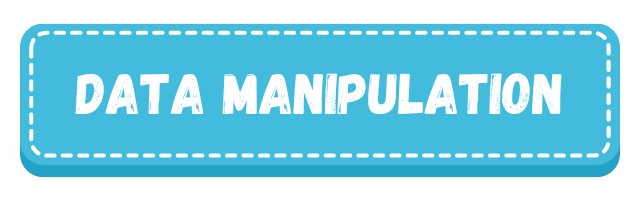

# Dealing with Add Ons

- Add-ons are all stored in a single column, separated by commas
- Before we visualize the addons we need to separate them so we can properly get counts

In [21]:
add_ons_df = df.copy()

# Split the add ons into a separate column
add_ons_df['All Add-ons'] = add_ons_df['Add-ons Purchased'].str.split(',')

# Explode the column to get the FULL count of each item
add_ons_df = add_ons_df.explode('All Add-ons')

# Remove white space around the add ons
add_ons_df['All Add-ons'] = add_ons_df['All Add-ons'].str.strip()

# Count the add ons
add_ons_df['All Add-ons'].value_counts().reset_index()

,All Add-ons,count
0,Impulse Item,10234
1,Accessory,10048
2,Extended Warranty,9975
3,None,4868


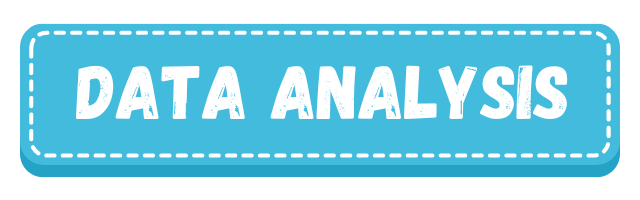

## Analysis
- Now that I have most of the data how I want.
- Lets start our analysis by grouping and visualizing various data points

### How many orders were actually completed for each Add on?

In [22]:
# Lets look at how many orders were actually completed for each Add on

# Group our add on data by order status
order_status_counts = add_ons_df.groupby(['Order Status', 'All Add-ons']).size().reset_index(name='Count')

# Show only the 'Completed' orders
order_status_counts_completed = order_status_counts[order_status_counts['Order Status'] == 'Completed']

order_status_counts_completed.columns = ['Status', 'Add-ons', 'Count']

order_status_counts_completed.sort_values(by='Count', ascending=False)

,Status,Add-ons,Count
6,Completed,Impulse Item,6888
4,Completed,Accessory,6713
5,Completed,Extended Warranty,6713
7,Completed,None,3287


### top add-ons for cancelled orders

In [23]:
# Show top add-ons for cancelled orders

# We can use the same grouped data from above 'order_status_counts'

# Show only the 'cancelled' orders
order_status_counts_cancelled = order_status_counts[order_status_counts['Order Status'] == 'Cancelled']

order_status_counts_cancelled.sort_values(by='Count', ascending=False)

,Order Status,All Add-ons,Count
2,Cancelled,Impulse Item,3346
0,Cancelled,Accessory,3335
1,Cancelled,Extended Warranty,3262
3,Cancelled,None,1581


### How many orders were actually completed for each Add on depending on shipping speed?

In [24]:
# Lets look at how many orders were actually completed for each Add on

# Group our add on data by shipping types
shipping_type_counts = add_ons_df.groupby(['Shipping Type', 'All Add-ons']).size().reset_index(name='Count')

shipping_type_counts.sort_values(by='Count', ascending=False)

,Shipping Type,All Add-ons,Count
18,Standard,Impulse Item,3473
16,Standard,Accessory,3403
17,Standard,Extended Warranty,3363
6,Express,Impulse Item,1717
10,Overnight,Impulse Item,1706
5,Express,Extended Warranty,1706
4,Express,Accessory,1694
8,Overnight,Accessory,1685
14,Same Day,Impulse Item,1677
2,Expedited,Impulse Item,1661


### Top add on for each shipping type

In [25]:
# Instead of showing ALL add ons, show only the top add on for each shipping type

# Show only the top Add on for each shipping type
top_addons_by_ship = shipping_type_counts.loc[shipping_type_counts.groupby('Shipping Type')['Count'].idxmax()]

# Sort values in new data
top_addons_by_ship.sort_values(by='Count', ascending=False)

,Shipping Type,All Add-ons,Count
18,Standard,Impulse Item,3473
6,Express,Impulse Item,1717
10,Overnight,Impulse Item,1706
14,Same Day,Impulse Item,1677
2,Expedited,Impulse Item,1661


### How does shipping type impact total sales (e.g., are express shipments more common for higher-value orders)?

### Total Revenue for each shipping type

In [26]:
# this data will count both completed and Cancelled orders
revenue_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().reset_index()

# Setting new column names
revenue_by_shipping.columns = ['Shipping Type', 'Total Revenue']

revenue_by_shipping = revenue_by_shipping.sort_values(by='Total Revenue', ascending=False).reset_index(drop=True)

revenue_by_shipping['Total Revenue'] = revenue_by_shipping['Total Revenue'].apply(lambda x: f"${x:,.2f}")

revenue_by_shipping

,Shipping Type,Total Revenue
0,Standard,"$21,343,073.55"
1,Expedited,"$12,437,526.21"
2,Same Day,"$12,432,024.82"
3,Overnight,"$8,704,828.17"
4,Express,"$8,685,215.62"


### Average order value (AOV) for each shipping type

In [27]:
# this data will count both completed and Cancelled orders
avg_revenue_shipping = df.groupby('Shipping Type')['Total Price'].mean().reset_index()

# Setting new column names
avg_revenue_shipping.columns = ['Shipping Type', 'Avg Revenue']

avg_revenue_shipping = avg_revenue_shipping.sort_values(by='Avg Revenue', ascending=False).reset_index(drop=True)

avg_revenue_shipping['Avg Revenue'] = avg_revenue_shipping['Avg Revenue'].apply(lambda x: f"${x:,.2f}")

avg_revenue_shipping

,Shipping Type,Avg Revenue
0,Expedited,"$3,801.20"
1,Same Day,"$3,790.25"
2,Standard,"$3,173.69"
3,Overnight,"$2,593.04"
4,Express,"$2,580.28"


# what is total count of each shipping type? and percentages?

In [28]:
tot_orders_by_ship = df.groupby('Shipping Type').size().reset_index(name='Count')

total_count_shippings = tot_orders_by_ship['Count'].sum()

# Calculate percentages
tot_orders_by_ship['Percentage'] = ((tot_orders_by_ship['Count'] / total_count_shippings) * 100).round(2)

tot_orders_by_ship = tot_orders_by_ship.sort_values(by='Count', ascending=False)

tot_orders_by_ship

,Shipping Type,Count,Percentage
4,Standard,6725,33.62
1,Express,3366,16.83
2,Overnight,3357,16.78
3,Same Day,3280,16.40
0,Expedited,3272,16.36


### Standard Shipping has almost twice as many orders, but does not have twice the revenue.
- Expedited has the lowest percentage of Total orders, but has the second highest revenue. 
- Expedited also has a $627 higher AOV over Standard shipping
- This tells us customers willing to spend more overall are also willing to spend on expedited shipping

### How do add-ons affect the total purchase price?

In [29]:
# Lets again make sure we are dealing with completed orders
completed_orders = loyalty_df[loyalty_df['Order Status'] == 'Completed'].copy()

# Calculate total purchase price without add-ons
completed_orders['Total Without Add-ons'] = completed_orders['Total Price'] - completed_orders['Add-on Total']

# Create a column indicating whether add-ons were purchased
completed_orders['Add-ons Purchased'] = completed_orders['Add-on Total'].apply(lambda x: 'Yes' if x > 0 else 'No')

completed_orders

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,YearMonth,Loyalty Status,Total Without Add-ons
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Yes,26.09,2024-04,Non Member,715.00
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,No,0.00,2023-10,Non Member,1855.84
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,Yes,60.16,2024-08,New Member,3104.60
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Yes,35.56,2024-05,Regular Member,5.94
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,Yes,65.78,2024-05,Non Member,17.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,No,0.00,2024-08,Regular Member,5394.56
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,No,0.00,2024-04,Non Member,3419.04
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,No,0.00,2024-06,Non Member,6838.08
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,Yes,198.98,2024-08,Churned,1606.92


### What is the average order value with and without add ons?

In [30]:
# Group by the presence of add-ons and calculate the average total price
add_on_aov = completed_orders.groupby('Add-ons Purchased')['Total Without Add-ons'].mean().round(2).reset_index()

# Rename the columns for clarity
add_on_aov.columns = ['Add-ons Purchased', 'AOV']

add_on_aov['AOV'] = add_on_aov['AOV'].apply(lambda x: f"${x:,.2f}")

add_on_aov

,Add-ons Purchased,AOV
0,No,"$3,198.85"
1,Yes,"$3,083.23"


### AOV WITH and Without Add-ons separated by loyalty status

In [31]:
# Find AOV for orders WITHOUT add ons
without_addon_aov = completed_orders.groupby('Loyalty Status')['Total Without Add-ons'].mean().round(2).reset_index()

without_addon_aov.columns = ['Loyalty Status', 'AOV Without Add-ons']

# Get this same info for orders WITH add ons
with_addon_aov = completed_orders.groupby('Loyalty Status')['Total Price'].mean().round(2).reset_index()

with_addon_aov.columns = ['Loyalty Status', 'AOV With Add-ons']

combined_aov = pd.merge(with_addon_aov, without_addon_aov, on='Loyalty Status')


combined_aov.sort_values(by='AOV Without Add-ons', ascending=False)


# Format values to look like currency
combined_aov['AOV With Add-ons'] = combined_aov['AOV With Add-ons'].apply(lambda x: f"${x:,.2f}")
combined_aov['AOV Without Add-ons'] = combined_aov['AOV Without Add-ons'].apply(lambda x: f"${x:,.2f}")


combined_aov


,Loyalty Status,AOV With Add-ons,AOV Without Add-ons
0,Churned,"$3,283.80","$3,223.51"
1,New Member,"$3,248.03","$3,186.68"
2,Non Member,"$3,181.04","$3,118.82"
3,Regular Member,"$3,056.97","$2,993.61"


### Interestingly orders WITHOUT add-ons have a higher AOV

-----

### What add on items are most popular for loyalty members?

In [32]:
# Lets look what add on items are most popular for loyalty members

loyalty_addons = add_ons_df.groupby(['Loyalty Member', 'All Add-ons']).size().reset_index(name='Count')

# Find only the loyalty member info
member_addons = loyalty_addons[loyalty_addons['Loyalty Member'] == 'Yes']

total_count = member_addons['Count'].sum()

# Calculate percentages
member_addons['Percentage'] = ((member_addons['Count'] / total_count) * 100).round(2)

# Sort values by count or percentage
member_addons.sort_values(by='Count', ascending=False, inplace=True)

member_addons

,Loyalty Member,All Add-ons,Count,Percentage
4,Yes,Accessory,2251,29.56
6,Yes,Impulse Item,2168,28.47
5,Yes,Extended Warranty,2144,28.15
7,Yes,None,1053,13.83


### What add on items are most popular for NON-loyalty members?

In [33]:
# We can easily look at the info for Non members as well

# Find only the loyalty member info
non_member_addons = loyalty_addons[loyalty_addons['Loyalty Member'] == 'No']

total_count_non = non_member_addons['Count'].sum()

# Calculate percentages
non_member_addons['Percentage'] = ((non_member_addons['Count'] / total_count_non) * 100).round(2)

# Sort values by count or percentage
non_member_addons.sort_values(by='Count', ascending=False, inplace=True)

non_member_addons

,Loyalty Member,All Add-ons,Count,Percentage
2,No,Impulse Item,8066,29.32
1,No,Extended Warranty,7831,28.47
0,No,Accessory,7797,28.34
3,No,None,3815,13.87


### How does age relate to Add-ons?

#### First we need to create a new dataframe using age groups and all the Add-ons

In [34]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Create a new column for age buckets
add_ons_df['Age Group'] = pd.cut(add_ons_df['Age'], bins=bins, labels=labels, right=False)

# Group by age groups and All Add-ons
age_addons = add_ons_df.groupby(['Age Group', 'All Add-ons']).size().reset_index(name='Count')

age_addons

,Age Group,All Add-ons,Count
0,18-24,Accessory,1061
1,18-24,Extended Warranty,1074
2,18-24,Impulse Item,1124
3,18-24,None,534
4,25-34,Accessory,1611
5,25-34,Extended Warranty,1551
6,25-34,Impulse Item,1584
7,25-34,None,763
8,35-44,Accessory,1683
9,35-44,Extended Warranty,1664


### top 5 add-ons by age group

In [35]:
age_addons.sort_values(by='Count', ascending=False).head()

,Age Group,All Add-ons,Count
10,35-44,Impulse Item,1720
8,35-44,Accessory,1683
9,35-44,Extended Warranty,1664
16,55-64,Accessory,1643
22,65-74,Impulse Item,1639


### Top add-on purchased by each age group

In [36]:
top_age_addons = age_addons.loc[age_addons.groupby('Age Group')['Count'].idxmax()]
top_age_addons.reset_index(drop=True) # reset index just for looks

,Age Group,All Add-ons,Count
0,18-24,Impulse Item,1124
1,25-34,Accessory,1611
2,35-44,Impulse Item,1720
3,45-54,Impulse Item,1633
4,55-64,Accessory,1643
5,65-74,Impulse Item,1639
6,75+,Impulse Item,919


# Loyalty Membership

## Loyalty member history

- Loyalty member status can be looked at by Customer_id, and comparing previous orders
    - For example: if they were a member in the previous order and are now NOT a member, they can be labelled as 'Churned'
    - And similarly, if they were NOT a member in their previous order and now ARE a member, they can be marked as 'New Member'
    - And we can classify regular members as such (when they stayed members the whole time) and Non members as such (When they were NEVER a member)
    
    

### To accurately count the Loyalty Members we need to look at UNIQUE customer_ID

In [37]:
# To accurately count the Members we need to look at UNIQUE customer_ID

Member_counts = df.groupby('Loyalty Member')['Customer ID'].nunique().reset_index()

Member_counts.columns = ['Loyalty Member', 'Count']

Member_counts = Member_counts.sort_values(by='Count', ascending=False)

Member_counts

,Loyalty Member,Count
0,No,10572
1,Yes,3834


### New member status counts

In [38]:
# Visualize member counts
New_Member_counts = loyalty_df.groupby('Loyalty Status')['Customer ID'].nunique().reset_index()

New_Member_counts.columns = ['Loyalty Status', 'Count']

New_Member_counts = New_Member_counts.sort_values(by='Count', ascending=False)

New_Member_counts

,Loyalty Status,Count
2,Non Member,9805
3,Regular Member,2682
0,Churned,1353
1,New Member,1328


### Original Loyalty members Count Visualized

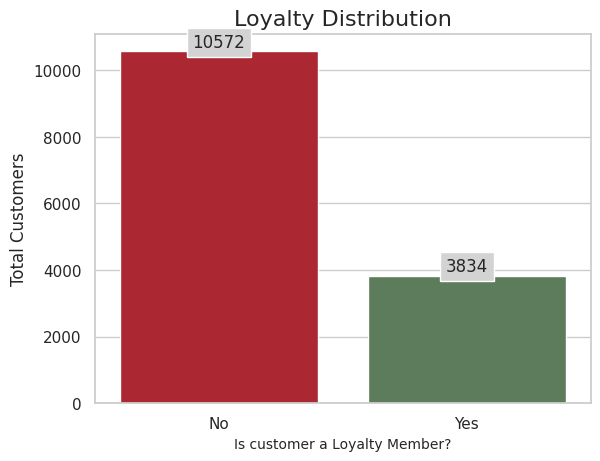

In [39]:
# Visualize Overall loyalty members

colors = ["#c1121f", "#588157"]

ax = sns.barplot(data=Member_counts, x='Loyalty Member', y='Count', palette=colors)
plt.title('Loyalty Distribution', fontsize=16)
plt.xlabel('Is customer a Loyalty Member?', fontsize=10)
plt.ylabel('Total Customers', fontsize=12)

ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))
plt.show()

### New memberships status counts visualized

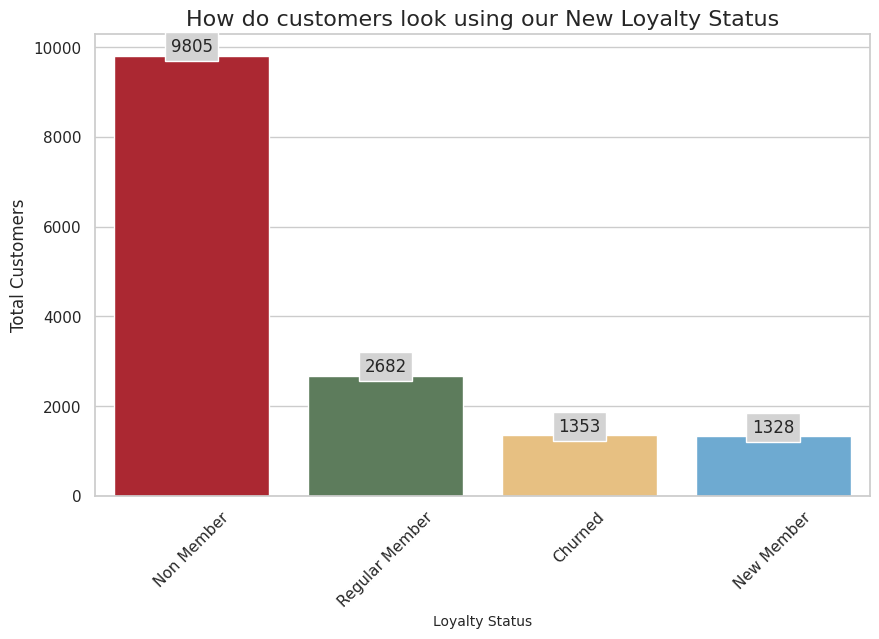

In [40]:
# Visualize New status memberships

colors = ["#c1121f", "#588157", "#f8c471", "#5dade2"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=New_Member_counts, x='Loyalty Status', y='Count', palette=colors)
plt.title('How do customers look using our New Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=10)
plt.ylabel('Total Customers', fontsize=12)
ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))

plt.xticks(rotation=45)
plt.show()

## How does membership look over time?

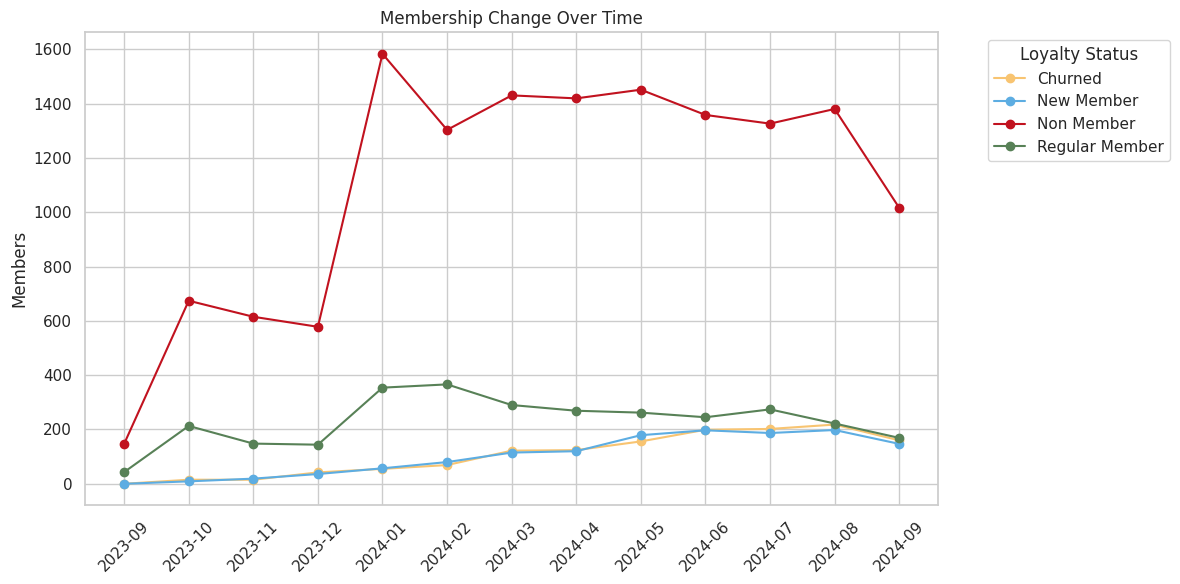

In [41]:
# Visualize membership over time

colors = {
    'Regular Member': "#588157",
    'Non Member': "#c1121f",
    'Churned': "#f8c471",
    'New Member': "#5dade2"
}

# Extract month and year from purchase date
loyalty_df['YearMonth'] = loyalty_df['Purchase Date'].dt.to_period('M')

# Count each loyalty status per month
members_counts = loyalty_df.groupby(['YearMonth', 'Loyalty Status']).size().reset_index(name='Count')

# Pivot the data to have statuses as columns
members_pivot = members_counts.pivot(index='YearMonth', columns='Loyalty Status', values='Count').fillna(0)

# Plot
plt.figure(figsize=(12, 6))

# Use a line plot for better visibility of trends
for status in members_pivot.columns:
    plt.plot(members_pivot.index.astype(str), members_pivot[status], marker='o', label=status, color=colors.get(status))

plt.title('Membership Change Over Time')
plt.xlabel('') # remove Date label because this data is obvious
plt.ylabel('Members')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## How do Sales look over time?

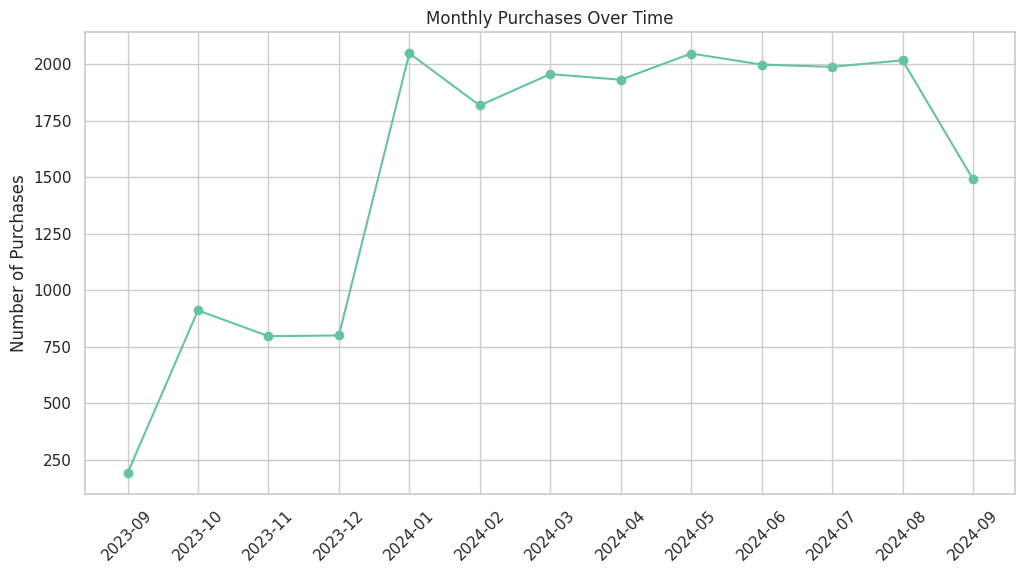

In [42]:
# visualize sales over time

# Set 'Purchase Date' as index
month_data = df.set_index('Purchase Date')

# Resample months
monthly_counts = month_data['Customer ID'].resample('M').count()

# change date format to YearMonth
monthly_counts.index = monthly_counts.index.strftime('%Y-%m')


plt.figure(figsize=(12, 6))
monthly_counts.plot(marker='o', linestyle='-')
plt.title('Monthly Purchases Over Time')
plt.xlabel('')
plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts.index, rotation=45)
plt.ylabel('Number of Purchases')
plt.show()

### The highest sales month was January 2024, With May 2024, and August 2024 closely behind. 
- Sales dip around September and stay down through the end of the year. We need to focus marketing on these holiday months since this is normally the biggest sales months (Nov, Dec) for most businesses.

#### Membership trend is Very similar to monthly purchase trending line
- Possible reason is the large number of non members vs other statuses so the order trend follows the majority
- The more likely scenario is just another artifact of the data being generated

## What is the average quantity purchased per transaction, and how does it vary by product?

In [43]:
avg_quantity_products = df.groupby('Product Type')['Quantity'].mean().reset_index(name='Avg Quantity')

avg_quantity_products.sort_values(by='Avg Quantity', ascending=False)

,Product Type,Avg Quantity
0,Headphones,5.560915
4,Tablet,5.519737
3,Smartwatch,5.498475
2,Smartphone,5.463366
1,Laptop,5.432671


# Is there difference in average order value (AOV) between loyalty members and non-members?

In [44]:
# Is there difference in average order value (AOV) between loyalty members and non-members?

avg_orders_members = loyalty_df.groupby('Loyalty Status')['Total Price'].mean().round(2).reset_index()

avg_orders_members.columns = ['Loyalty Status', 'AOV']

avg_orders_members['AOV'] = avg_orders_members['AOV'].apply(lambda x: f"${x:,.2f}")

avg_orders_members.sort_values(by='AOV', ascending=False)

,Loyalty Status,AOV
1,New Member,"$3,237.40"
2,Non Member,"$3,192.94"
0,Churned,"$3,182.00"
3,Regular Member,"$3,092.65"


### Orders are ever so slightly higher for new members vs other categories.
- This could be down to new member beneifts (Free shipping or discount on first orders) which cause higher orders?
- Mean is also susceptible to outliers. There is not enough of a difference in AOV for me to investigate further 

## Total revenue generated from completed sales

In [45]:
# Calculate total revenue
total_revenue = completed_orders['Total Price'].sum()

formatted_revenue = "${:,.2f}".format(total_revenue)

print('Total Revenue: ', formatted_revenue)

Total Revenue:  $42,629,615.57


#### Top 5 months by Revenue
- We will only look at 'Completed' Sales

In [46]:
totals_df = df.copy()

totals_df['Purchase Month'] = pd.to_datetime(totals_df['Purchase Date'])

totals_df.set_index('Purchase Month', inplace=True)

monthly_revenue = totals_df[totals_df['Order Status'] == 'Completed'].resample('M')['Total Price'].sum()

monthly_revenue = monthly_revenue.reset_index()

monthly_revenue['Purchase Month'] = monthly_revenue['Purchase Month'].dt.strftime('%Y-%m')

formatted_revenue = monthly_revenue.copy()

formatted_revenue = formatted_revenue.sort_values(by='Total Price', ascending=False).head().reset_index(drop=True) # Reset index just for looks

formatted_revenue['Total Price'] = formatted_revenue['Total Price'].apply(lambda x: f"${x:,.2f}")

formatted_revenue.head()

,Purchase Month,Total Price
0,2024-01,"$4,516,277.81"
1,2024-06,"$4,465,994.71"
2,2024-05,"$4,462,915.20"
3,2024-07,"$4,460,946.48"
4,2024-08,"$4,378,433.10"


### Top 5 months Graph

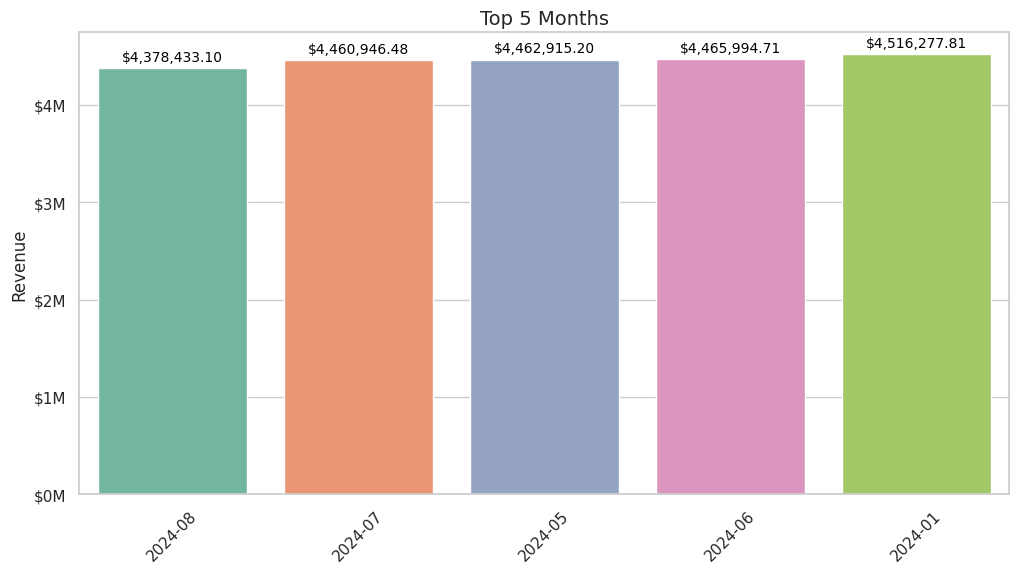

In [47]:
# Get only the top 5 months
top5_months = monthly_revenue.sort_values(by='Total Price').tail(5)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top5_months, x='Purchase Month', y='Total Price')
plt.title('Top 5 Months', fontsize=14)
plt.xlabel('')
plt.ylabel('Revenue')
plt.xticks(rotation=45)


# Show the revenue above each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black', 
                xytext=(0, 3),  # adjust value to move text
                textcoords='offset points')

# Format y-axis ticks
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1_000_000:.0f}M'))


plt.show()

### Revenue by Month visualized

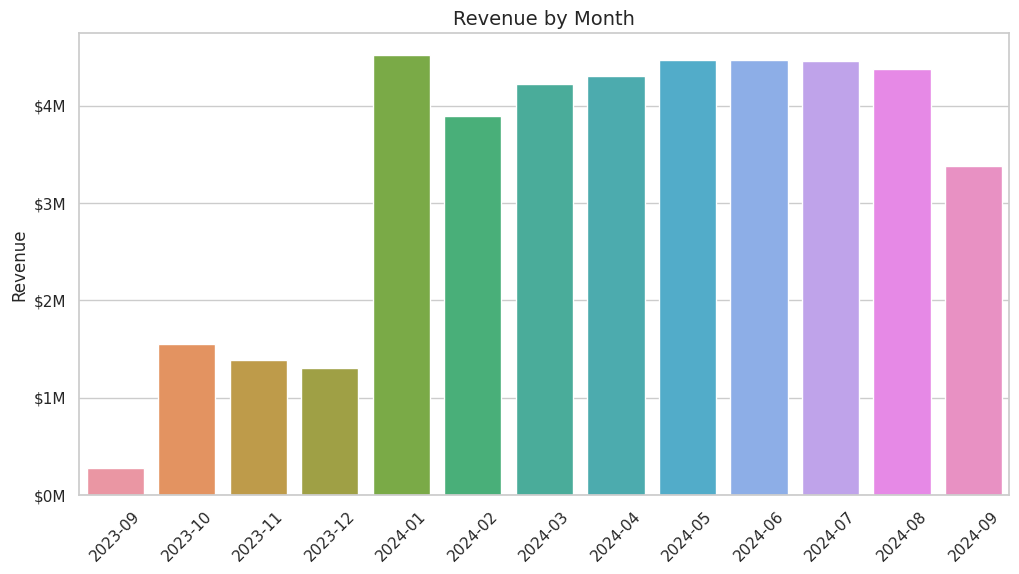

In [48]:
# Graph all months by revenue

top_months = monthly_revenue

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_months, x='Purchase Month', y='Total Price')
plt.title('Revenue by Month', fontsize=14)
plt.xlabel('')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

# Format y-axis ticks
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1_000_000:.0f}M'))

plt.show()

## Revenue by Season
- We have interesting time period to deal with going from September to September.
- Our Fall numbers have the least amount of orders so even if we combine them we are still missing information and Fall will still be the lowest revenue
    - Because of this I will not be fixing this issue and just leave things as they are

In [49]:
# map months to seasons
def get_season(month):
    month = int(month.split('-')[1])  # Convert month to number
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to get our seasons
top_months['Season'] = top_months['Purchase Month'].apply(get_season)

# Group by season and sum the total price
seasonal = top_months.groupby('Season')['Total Price'].sum().reset_index()

seasonal.columns = ['Season', 'Total Revenue']

seasonal = seasonal.sort_values(by='Total Revenue', ascending=False).reset_index(drop=True)

seasonal['Total Revenue'] = seasonal['Total Revenue'].apply(lambda x: f"${x:,.2f}")

seasonal

,Season,Total Revenue
0,Summer,"$13,305,374.29"
1,Spring,"$12,989,365.54"
2,Winter,"$9,723,550.84"
3,Fall,"$6,611,324.90"


## How does revenue vary by product?
- Lets only look at 'Completed' sales

### Total Revenue for each product

In [50]:
# Total Revenue for each product

product_sales = df.copy()

# Filter by completed orders and then group the data
product_sales = product_sales[product_sales['Order Status'] == 'Completed'].groupby('Product Type')['Total Price'].sum().reset_index()

# Rename columns for clarity
product_sales.columns = ['Product Type', 'Total Revenue']

product_sales = product_sales.sort_values(by='Total Revenue', ascending=False).reset_index(drop=True)

product_sales['Total Revenue'] = product_sales['Total Revenue'].apply(lambda x: f"${x:,.2f}")

product_sales

,Product Type,Total Revenue
0,Smartphone,"$14,407,835.84"
1,Smartwatch,"$9,398,591.23"
2,Laptop,"$8,365,905.25"
3,Tablet,"$7,722,632.25"
4,Headphones,"$2,734,651.00"


### Top 5 months across all Products

In [51]:
# Product Sales by month

monthly_products = df.copy()

# Filter for completed orders
monthly_products = monthly_products[monthly_products['Order Status'] == 'Completed']

monthly_products['Purchase Month'] = monthly_products['Purchase Date'].dt.to_period('M')

# sum total price by month and product type
monthly_products = monthly_products.groupby(['Purchase Month', 'Product Type'])['Total Price'].sum().reset_index()

# Sort results
monthly_products = monthly_products.sort_values(by=['Total Price', 'Product Type'], ascending=[False, True])

# Find TOP month for each product
top_monthly_products = monthly_products.loc[monthly_products.groupby('Product Type')['Total Price'].idxmax()]

# rename columns for clarity
top_monthly_products.columns = ['Top Month', 'Product', 'Total Revenue']

# Sort
top_monthly_products = top_monthly_products.sort_values(by='Total Revenue', ascending=False).reset_index(drop=True) # Reset index just for looks

# Format values to currency
top_monthly_products['Total Revenue'] = top_monthly_products['Total Revenue'].apply(lambda x: f"${x:,.2f}")


top_monthly_products

,Top Month,Product,Total Revenue
0,2024-06,Smartphone,"$1,626,691.74"
1,2024-05,Smartwatch,"$1,010,548.13"
2,2024-07,Tablet,"$978,979.74"
3,2024-01,Laptop,"$942,944.64"
4,2024-01,Headphones,"$365,875.34"


In [52]:
# Convert 'Purchase Month' back to datetime for plotting
monthly_products['Purchase Month'] = monthly_products['Purchase Month'].dt.to_timestamp()

# How did each product perform overtime?

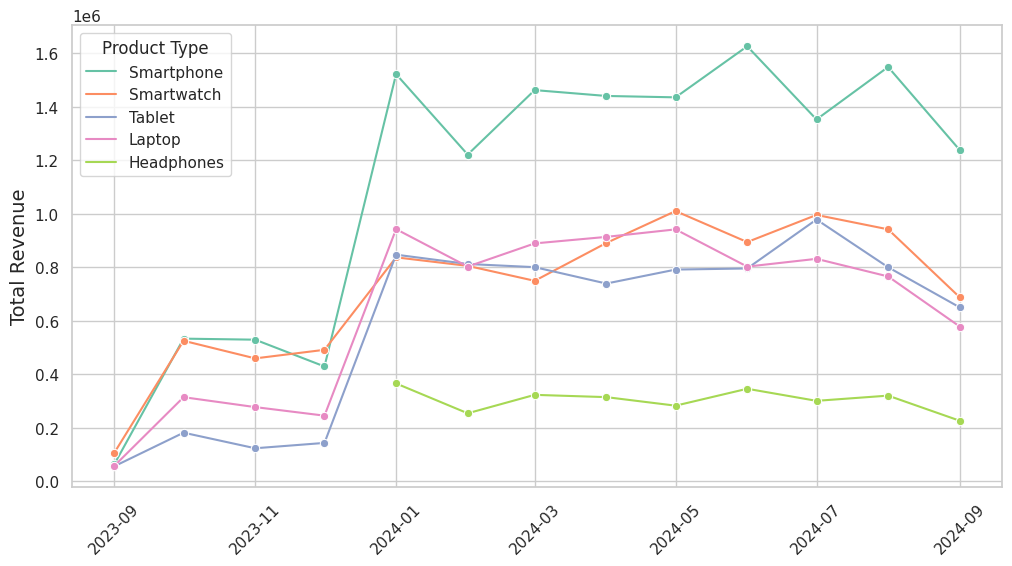

In [53]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_products, x='Purchase Month', y='Total Price', hue='Product Type', marker='o')
# plt.title('How does each product perform over time?', fontsize=16)
plt.xlabel('') # remove pointless labels
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)

plt.show()

## What is the average age of customers for each product?

In [54]:
df['Age'].describe()

count    20000.000000
mean        48.994100
std         18.038745
min         18.000000
25%         33.000000
50%         49.000000
75%         65.000000
max         80.000000
Name: Age, dtype: float64

In [55]:
# Overall average age?

average_age_overall = df['Age'].mean().round(2)

print('Average Age: ', average_age_overall)

Average Age:  48.99


### Visualize age distibution

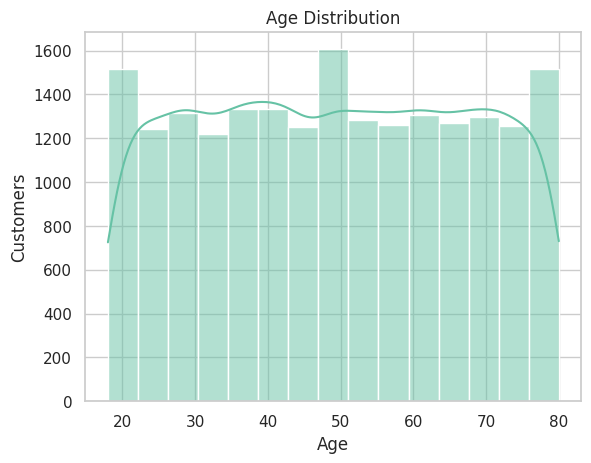

In [56]:
# Visualize age distibution

# Plot
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.ylabel('Customers', fontsize=12)
plt.show()

### Avg age customer for each product

In [57]:
# Avg age customer for each product
average_age = df.groupby('Product Type')['Age'].mean().round(2).reset_index()

average_age

,Product Type,Age
0,Headphones,48.24
1,Laptop,48.76
2,Smartphone,49.10
3,Smartwatch,49.31
4,Tablet,49.14


### youngest and oldest customers for each product

In [58]:
# lets look at youngest and oldest

age_extremes = df.groupby('Product Type')['Age'].agg(['min', 'max']).reset_index()

age_extremes

,Product Type,min,max
0,Headphones,18,80
1,Laptop,18,80
2,Smartphone,18,80
3,Smartwatch,18,80
4,Tablet,18,80


### It looks like we have become a victim of generated data yet again. 
- Avg age, min and max age are the same across all products
- I think if I make another dataset like this I will increase randomization to avoid this type of issue.

### Visualization of Gender Distribution

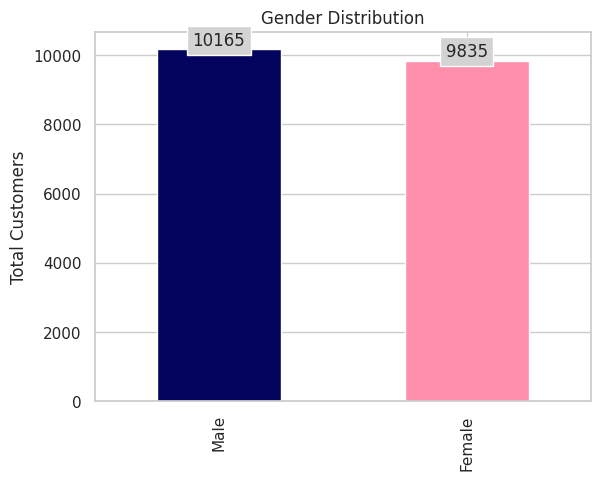

In [59]:
# Visualization

# Lets look overall Gender Counts
gender_counts = df['Gender'].value_counts()
 
# Define colors for each gender
colors = ["#03045e", "#ff8fab"]

# Plot
ax = gender_counts.plot(kind='bar', color=colors)
plt.title('Gender Distribution')

# I like to remove pointless labels when the context is obvious
plt.xlabel('')
plt.ylabel('Total Customers')

# Add value labels to the bars
ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))
plt.show()

## How does gender distribution vary among purchasers?

In [60]:
purch_by_gender = df.groupby('Product Type')['Gender'].value_counts().reset_index()

purch_by_gender

,Product Type,Gender,count
0,Headphones,Male,1044
1,Headphones,Female,967
2,Laptop,Male,2002
3,Laptop,Female,1971
4,Smartphone,Male,2998
5,Smartphone,Female,2980
6,Smartwatch,Male,2033
7,Smartwatch,Female,1901
8,Tablet,Male,2088
9,Tablet,Female,2016


### Top 5 Products by Gender Order Count

In [61]:
# If we want to look at just the top results and see what info we can gather from that

purch_by_gender.sort_values(by='count', ascending=False).head(5)

,Product Type,Gender,count
4,Smartphone,Male,2998
5,Smartphone,Female,2980
8,Tablet,Male,2088
6,Smartwatch,Male,2033
9,Tablet,Female,2016


## Do loyalty members have a higher average rating for products compared to non-members?


### Distribution of all customer ratings

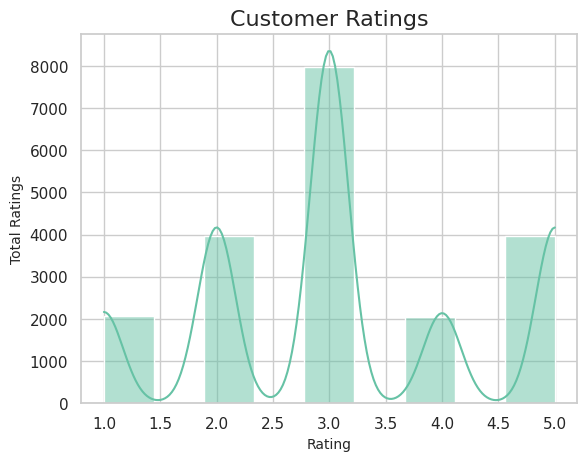

In [62]:
sns.histplot(df['Rating'], bins=9, kde=True)
plt.title('Customer Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Total Ratings', fontsize=10)
plt.show()

### Average rating is almost identical for all loyalty statuses.

In [63]:
# We have the option of using our New loyalty statuses instead of just YES or NO.

# I feel like I want to look at it just for even more information

loyalty_df.groupby('Loyalty Status')['Rating'].mean().reset_index()

,Loyalty Status,Rating
0,Churned,3.089325
1,New Member,3.067708
2,Non Member,3.091036
3,Regular Member,3.121707


### The number of '3' and '5' star ratings are slightly higher for Non Members.
- This is only because the overall count of ratings is higher since there are more Non Members
- Each loyalty status follows the same trending line as the overall Rating trend

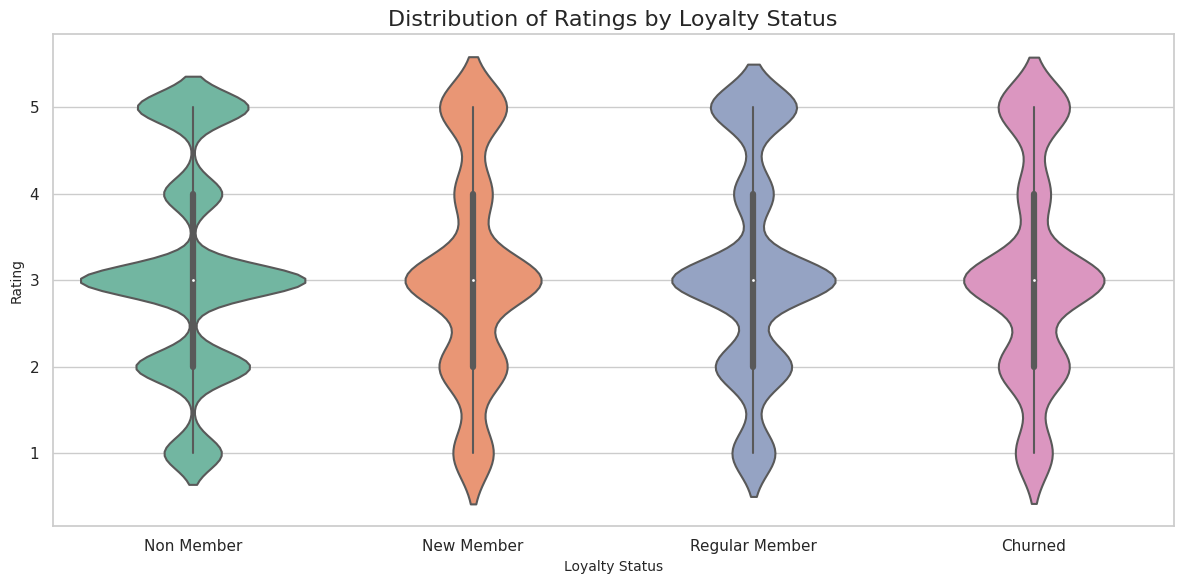

In [64]:
# Create a violin plot to visualize the distribution of ratings by loyalty status
plt.figure(figsize=(12, 6))
sns.violinplot(data=loyalty_df, x='Loyalty Status', y='Rating')

# Customize the plot
plt.title('Distribution of Ratings by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=10)
plt.ylabel('Rating', fontsize=10)

# Show the plot
plt.xticks(rotation=0)  # Keep x-ticks horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## How does customer feedback sentiment correlate with order status?

In [65]:
# calculate average rating
sentiment_analysis = df.groupby('Order Status')['Rating'].mean().reset_index()

sentiment_analysis.columns = ['Order Status', 'Average Rating']

print(sentiment_analysis)

  Order Status  Average Rating
0    Cancelled        3.086632
1    Completed        3.097528


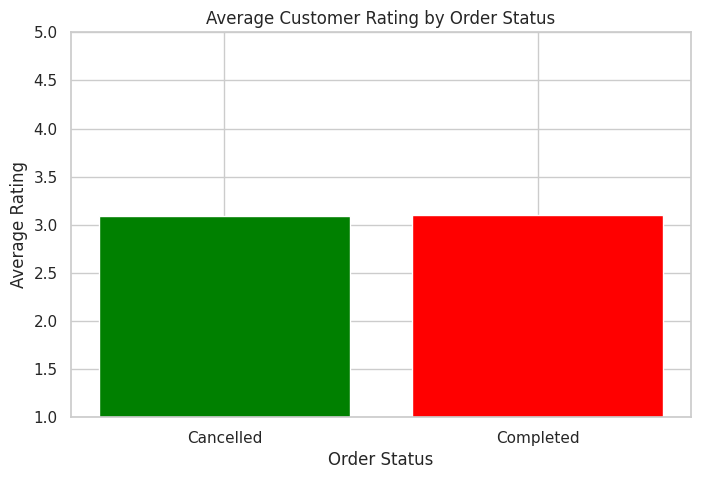

In [66]:
# Visualize the rating analysis
plt.figure(figsize=(8, 5))
plt.bar(sentiment_analysis['Order Status'], sentiment_analysis['Average Rating'], color=['green', 'red'])
plt.title('Average Customer Rating by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Rating')
plt.ylim(1, 5) # Set vertical scale between 1-5

plt.show()

## Payment Type Analysis
- Lets look at payment type data and see what information we can garner
- Before we analyze payment types we need to fix the issue with 'Paypal' and 'PayPal'

#### We need to fix 'Paypal' and 'PayPal' and combine them

In [67]:
# fix all 'PayPal' values
df['Payment Method'] = df['Payment Method'].replace({'PayPal': 'Paypal'})

# Make sure all values were fixed
df[df['Payment Method'] == 'PayPal']

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,YearMonth


## Payment Method Distribution 
- this info will follow ALL orders not just 'completed' orders

In [68]:
df['Payment Method'].value_counts().reset_index()

,Payment Method,count
0,Credit Card,5868
1,Paypal,5798
2,Bank Transfer,3371
3,Cash,2492
4,Debit Card,2471


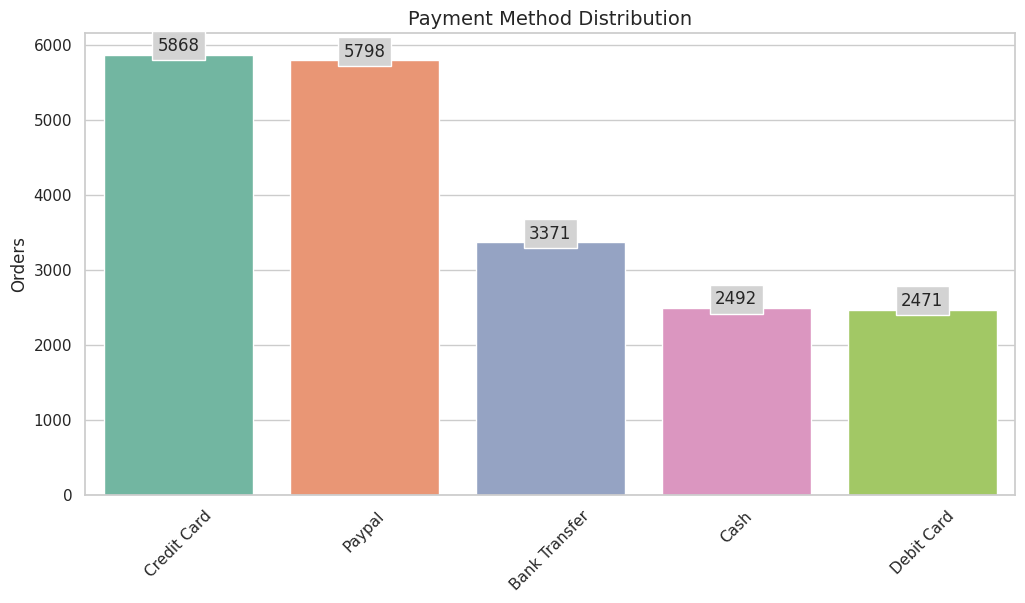

In [69]:
# Calculate count of each payment method
payment_counts = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Payment Method', order=payment_counts.index)  # Order methods by count
plt.title('Payment Method Distribution', fontsize=14)
plt.xlabel('')
plt.ylabel('Orders')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))
plt.show()

### What is the average order value of each payment type?

In [70]:
Avg_order_by_payment = df.groupby('Payment Method')['Total Price'].mean().round(2).reset_index()

Avg_order_by_payment.sort_values(by='Total Price', ascending=False)

,Payment Method,Total Price
0,Bank Transfer,3766.91
4,Paypal,3276.79
2,Credit Card,3223.21
3,Debit Card,2726.11
1,Cash,2510.26


### What are order completion rates by payment type?

In [71]:
payment_type_completion = completed_orders.groupby('Payment Method')['Order Status'].value_counts().reset_index(name='Count')

payment_type_completion['Percent Completed'] = ((payment_type_completion['Count'] / 20000) * 100).round(2)

payment_type_completion = payment_type_completion.sort_values(by='Count', ascending=False)

payment_type_completion

,Payment Method,Order Status,Count,Percent Completed
2,Credit Card,Completed,3899,19.50
0,Bank Transfer,Completed,2259,11.30
4,PayPal,Completed,2235,11.18
1,Cash,Completed,1727,8.64
3,Debit Card,Completed,1684,8.42
5,Paypal,Completed,1628,8.14


### How do Payment methods differ by Loyalty member status?

### Top 5 payment methods

In [72]:
payment_counts = loyalty_df.groupby(['Loyalty Status', 'Payment Method']).size().reset_index(name='Count')

payment_counts.sort_values(by=['Count'], ascending=False).head()

,Loyalty Status,Payment Method,Count
14,Non Member,Credit Card,4227
12,Non Member,Bank Transfer,2386
16,Non Member,PayPal,2323
13,Non Member,Cash,1804
17,Non Member,Paypal,1776


##### Non Members have the largest amount of orders, so it makes sense they also have the top counts for each payment method.

### Top Payment method for each Loyalty Status

In [73]:
# top payment method for each loyalty status
top_payment_methods = payment_counts.loc[payment_counts.groupby('Loyalty Status')['Count'].idxmax()]

top_payment_methods.sort_values(by='Count', ascending=False)

,Loyalty Status,Payment Method,Count
14,Non Member,Credit Card,4227
20,Regular Member,Credit Card,833
2,Churned,Credit Card,413
8,New Member,Credit Card,395


#### Credit card is the top payment method regardless of loyalty status

## Completed Analysis
- I believe I have exhausted all significant angles to approach the data. 
    - I now have a vast array of data and graphs laid out to sift through to build my insight and recommendations

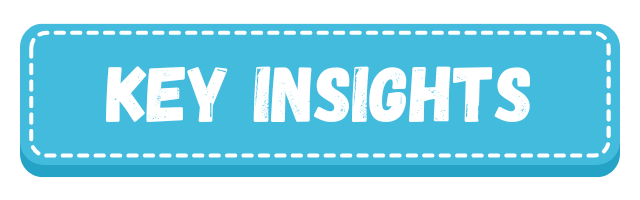

# Insights

## 1. Sales Performance

Total revenue from completed sales: **42,629,615.57**.

**Revenue by Product Type:**
<br>

| Product Type | Total Revenue      |
|--------------|---------------------|
| **Smartphone** | 14,407,835.84    |
| **Smartwatch** | 9,398,591.23     |
| **Laptop**     | 8,365,905.25     |
| **Tablet**     | 7,722,632.25     |
| **Headphones** | 2,734,651.00     |

<br>

Smartphones dominate our sales, accounting for **33.8%** of total revenue, indicating strong market demand.

## 2. Customer Demographics

Our products appeal to a broad age range (18-80 years). Gender distribution is relatively even for smartphones, but there’s a male preference for tablets and smartwatches.

**Top Product Orders by Gender:**

| Product Type        | Count |
|---------------------|-------|
| **Smartphone (Male)**   | 2998  |
| **Smartphone (Female)** | 2980  |
| **Tablet (Male)**       | 2088  |
| **Smartwatch (Male)**   | 2033  |
| **Tablet (Female)**     | 2016  |

## 3. Loyalty Program Impact

Extended Warranty purchase rate is higher for Non loyalty members. 

This suggests we do not have enough benefits for loyalty members and should focus our loyalty efforts on extra benefits.


**Average Order Value (AOV) by Loyalty Status:**

| Loyalty Status   | AOV       |
|------------------|-----------|
| **New Member**    | 3,237.40  |
| **Non Member**    | 3,192.94  |
| **Churned**       | 3,182.00  |
| **Regular Member** | 3,092.65  |

New members have the highest AOV, suggesting a need to revitalize our loyalty program.

## 4. Order Status and Seasonal Trends

Cancellation rate: **32.84%**, which is concerning.

**Seasonal Revenue:**

| Season | Total Revenue      |
|--------|---------------------|
| **Summer** | 13,305,374.29     |
| **Spring** | 12,989,365.54     |
| **Winter** | 9,723,550.84      |
| **Fall**   | 6,611,324.90      |

Sales peak in January 2024, with May and August close behind. Sales dip from September through December.

## 5. Add-ons and Shipping Impact

**Orders without add-ons have a higher AOV:**

| Add-ons Purchased | AOV       |
|-------------------|-----------|
| **No Add-ons**    | 3,198.85  |
| **With Add-ons**  | 3,083.23  |

Expedited shipping is the star of the show!

Expedited has the lowest percentage of Total orders, but has the second highest revenue. 

Expedited shipping has a **$627 higher AOV** than standard shipping.

<br>


## 6. Payment Methods and Customer Behavior

Credit cards and PayPal are equally popular. Bank transfers show a **$500 higher average spend** but also an **8% higher cancellation rate**.

Impulse items are popular across most age groups. The **25-34** and **55-64** age groups purchase more accessories, while the **35-44** age group has the highest percentage of warranty add-ons.


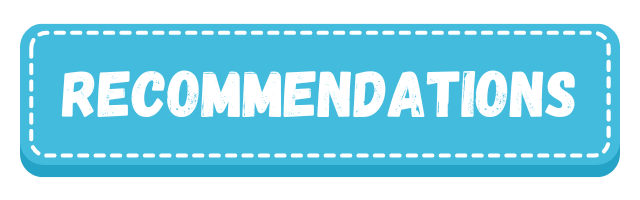

## Recommendations

1. **Revamp the Loyalty Program**
   - Incentivize higher spending among regular members.
   - Consider tiered benefits and additional warranty options.

2. **Investigate Cancellation Rates**
   - Focus on root causes of the high cancellation rate.
   - Improve order fulfillment, product descriptions, and customer communication to reduce cancellations.

3. **Targeted Marketing Campaigns**
   - Develop campaigns for the fall and winter seasons, particularly for November and December, to align with typical retail high-sales periods.

4. **Reassess Add-on Strategy**
   - Personalize add-on offers based on customer purchase history and preferences.

5. **Exclusive Benefits for Loyalty Members**
   - Offer loyalty members exclusive benefits like free expedited shipping or discounted extended warranties.
   - Target the **35-44 age group**, who show higher interest in warranties.

6. **Age-Specific Marketing Strategies**
   - Focus on accessories for the **25-34** and **55-64 age groups**.
   - Emphasize warranties for the **35-44 age group**.

7. **Address Bank Transfer Cancellations**
   - Investigate the higher cancellation rate for bank transfer orders.
   - Consider offering incentives or guarantees to encourage this high-value payment method while mitigating risks.

8. **Gender-Specific Marketing Strategies**
   - Develop strategies for non-smartphone categories to balance out the current male-skewed purchases in tablets and smartwatches.

---

By implementing these recommendations, we can optimize our sales strategy, enhance customer satisfaction, and drive growth across all product categories and customer segments.
